## Observations and Insights 

In [62]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_combined = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
mouse_study_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [63]:
# Checking the number of mice.
total_mice=len(mouse_study_combined["Mouse ID"].unique())
total_mice=pd.DataFrame ({"Total Mice":[total_mice]})
total_mice.head()

,Total Mice
0,249


In [64]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_mice = mouse_study_combined.loc[mouse_study_combined.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicate_mice

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [65]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_combined[mouse_study_combined["Mouse ID"] != "g989"]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice in the clean DataFrame
new_total_mice=len(clean_df["Mouse ID"].unique())
new_total_mice=pd.DataFrame ({"Total Mice": [new_total_mice]})
new_total_mice.head()

,Total Mice
0,248


## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

#groupby drug regimen
drug_info = clean_df.groupby(["Drug Regimen"])
#mean tumor volume
average_tumor_volume = drug_info["Tumor Volume (mm3)"].mean()
#median tumor volume
median_tumor_volume = drug_info["Tumor Volume (mm3)"].median()
#variance tumor volume
variance_tumor_volume = drug_info["Tumor Volume (mm3)"].var()
#standarad deviation tumor volume
standard_deviation_tumor_volume = drug_info["Tumor Volume (mm3)"].std()
#SEM tumor volume
sem_tumor_volume = drug_info["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
tumor_volume_df = pd.DataFrame({"Tumor Volume Mean":average_tumor_volume,
                               "Tumor Volume Median":median_tumor_volume,
                               "Tumor Volume Variance":variance_tumor_volume,
                               "Tumor Volume Standard Deviation":standard_deviation_tumor_volume,
                               "Tumor Volume SEM":sem_tumor_volume})
tumor_volume_df.head()

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_groupby = clean_df.groupby("Drug Regimen")
stats_table = tumor_volume_groupby.agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
stats_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<function matplotlib.pyplot.show(close=None, block=None)>

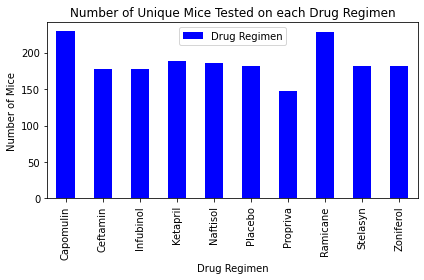

In [69]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_tested = pd.DataFrame(drug_info["Drug Regimen"].count())

mice_tested_bar_chart = mice_tested.plot(kind = "bar", title="Number of Unique Mice Tested on each Drug Regimen", color="blue")
mice_tested_bar_chart.set_xlabel("Drug Regimen")
mice_tested_bar_chart.set_ylabel("Number of Mice")
plt.tight_layout()
plt.show


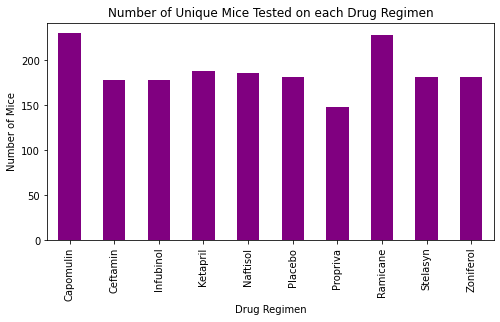

In [70]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_tested))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,4))
plt.bar(x_axis, mice_tested["Drug Regimen"], color = "purple", align = "center", width = 0.5)
plt.xticks(tick_locations, list(mice_tested.index), rotation = "vertical")

plt.xlim(-0.5, len(x_axis)-0.5)
plt.ylim(0, max(mice_tested["Drug Regimen"])*1.05)

plt.title("Number of Unique Mice Tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


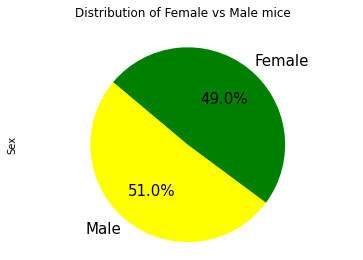

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data = clean_df["Sex"].value_counts()

gender_data.plot(kind="pie", subplots = True, title = "Distribution of Female vs Male mice", startangle=140,
                autopct='%1.1f%%', fontsize=15, colors= ["yellow","green"], legend=False)
plt.axis("equal")
plt.show()


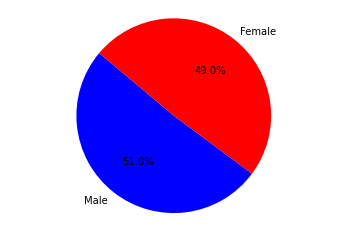

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_data, labels=["Male", "Female"], colors=["blue","red"],
       autopct="%1.1f%%", startangle=140)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [73]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_df = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
treatments_df = treatments_df.sort_values(["Timepoint"], ascending=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
treatments_merge = pd.merge(treatments_df, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')

# Tumor volume at last timepoint
tumor_volume = treatments_df[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_volume

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [76]:
# Put treatments into a list for for loop (and later for plot labels)
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]


capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_tumor_volume = pd.DataFrame(capomulin_last)
capomulin_merge = pd.merge(capomulin_tumor_volume, clean_df, on = ('Mouse ID', 'Timepoint'), how = 'left')
#capomulin_merge

capomulin_tumors = capomulin_merge["Tumor Volume (mm3)"]
quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq=quartiles[.25]
upperq=quartiles[.75]
iqr=upperq-lowerq

print(f"The lower quartile of Capomulin tumors is: {lowerq}")
print(f"The upper quartile of Capomulin tumors is: {upperq}")
print(f"The interquartile range of Capomulin tumors is: {iqr}")
#print(f"The median of Capomulin tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
#Ramicane_tumor_volume = pd.DataFrame(Ramicane_last)
#infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
#Infubinol_tumor_volume = pd.DataFrame(Infubinol_last)
#ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
#Ceftamin_tumor_volume = pd.DataFrame(Ceftamin_last)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds


The lower quartile of Capomulin tumors is: 32.37735684
The upper quartile of Capomulin tumors is: 40.1592203
The interquartile range of Capomulin tumors is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
